# --- EXERCISE 5.9 (Part 2) - INTRO INTO DATA VIZ. WITH PYTHON ---

## Task 1 - Importing Libraries and Customer-Order-Product dataset

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Setting up 'path' variable to import CUSTOMER-ORDER-PRODUCT dataset to Jupyter

path=r'C:\Users\LENOVO\Desktop\CF - Data Analytics\Achievement 5\Achievement 5 - PROJECT'

In [3]:
# Importing CUSTOMER-ORDER-PRODUCT dataset and assigning it to a dataframe

df_cust_ord_prod=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [5]:
# Checking the datatypes of all columns in CUSTOMER-ORDER-PRODUCT dataset

df_cust_ord_prod.dtypes

user_id                      int32
First Name                  object
Surname                   category
Gender                    category
State                     category
Age                           int8
number_of_dependants          int8
family_status             category
income                       int32
order_number                 int16
orders_day_of_week            int8
ordered_hour                  int8
days_since_prior_order     float16
product_id                    int8
add_to_cart_order             int8
reordered                     int8
product_name              category
aisle_id                      int8
department_id                 int8
prices                     float16
price_range_loc           category
Busiest Day               category
Busiest DAYS              category
Busiest_Period_of_Day     category
Max_Order                    int16
loyalty_flag              category
Average_Spend              float16
Spend_Flag                category
Visit_Frequency     

In [6]:
# Checking the number of rows and columns in CUSTOMER-ORDER-PRODUCT dataset

df_cust_ord_prod.shape

(32404859, 30)

## Task 3 - Histogram

In [7]:
df_cust_ord_prod['ordered_hour'].value_counts()

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: ordered_hour, dtype: int64

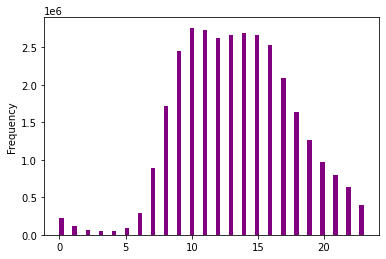

In [42]:
hist = df_cust_ord_prod['ordered_hour'].plot.hist(bins=70, color='purple')

# Plotting a Histogram based on the frequency of the customer visits in a day

### The above histogram shows the frequency of customer visits during every hour in a day.

### It can be seen that the highest frequency of visits happens at 10am in the morning, followed by 11am. This is can understood as people buying groceries in the morning due to their convenience and needs.

### The lowest frequency lies at 3am followed by 4am and 2am and this is because not many customers visit the online grocery store during the very early hours of the day.

## Task 4 - Bar Charts

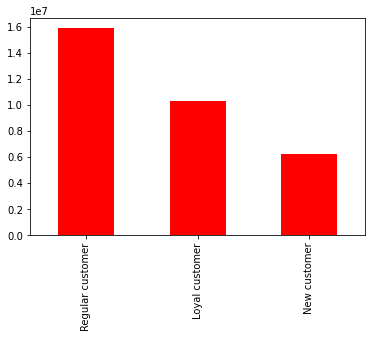

In [43]:
bar = df_cust_ord_prod['loyalty_flag'].value_counts().plot.bar(color='red')

# Plotting a bar chart for the different types customers based on their loyalty

## Task 5 - Line Graphs

In [19]:
np.random.seed(10)

# Setting the seed

In [20]:
dev = np.random.rand(len(df_cust_ord_prod)) <= 0.7

# Create a list holding TRUE/FALSE values to the test np.random.rand() <= 0.7

In [21]:
big = df_cust_ord_prod[dev]

# All values <= 0.7 are stored in the dataframe 'big' (TRUE values)
# Stores 70% of the sample in the dataframe 'big'

In [22]:
small = df_cust_ord_prod[~dev]

# All values > 0.7 are stored in the dataframe 'small' (FALSE values)
# Stores 30% of the sample in the dataframe 'small'

In [23]:
len(df_cust_ord_prod)

32404859

In [24]:
len(big)+len(small)

32404859

In [25]:
df_1 = small[['ordered_hour', 'prices']]

# Creating dataframe 'df_1' with only 'prices' and 'ordered_hour'

In [26]:
df_1.max()

ordered_hour    23.0
prices           inf
dtype: float64

In [27]:
df_1.loc[df_1['prices'] > 100]

# To check if there are prices with value above 100 in df_1

,ordered_hour,prices
10303,8,14896.0
27948,8,14896.0
50077,11,14896.0
50083,10,14896.0
50093,19,14896.0
...,...,...
32296164,10,14896.0
32328822,10,14896.0
32350994,9,14896.0
32355766,12,14896.0


In [29]:
df_1.loc[df_1['prices'] >100, 'prices'] = np.nan

# Marks the price values above 100 as MISSING(NaN) - Data Consistency Check

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


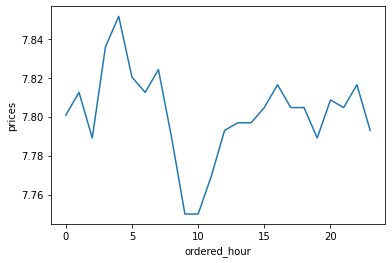

In [44]:
line_1 = sns.lineplot(data = df_1, x = 'ordered_hour', y='prices')

# To create line chart for the columns 'ordered_hour' and 'prices'

## Task 6 

In [34]:
df_cust_ord_prod.head()

,user_id,First Name,Surname,Gender,State,Age,number_of_dependants,family_status,income,order_number,...,price_range_loc,Busiest Day,Busiest DAYS,Busiest_Period_of_Day,Max_Order,loyalty_flag,Average_Spend,Spend_Flag,Visit_Frequency,Frequency_Flag
0,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,5,...,Mid-range Product,Regularly busy,Busy Days,Most Orders,8,New customer,7.988281,Low Spender,19.0,Regular Customer
1,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,7,...,Mid-range Product,Regularly busy,Regular Days,Most Orders,8,New customer,7.988281,Low Spender,19.0,Regular Customer
2,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,8,...,Mid-range Product,Regularly busy,Busy Days,Most Orders,8,New customer,7.988281,Low Spender,19.0,Regular Customer
3,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,2,...,Mid-range Product,Regularly busy,Regular Days,Most Orders,8,New customer,7.988281,Low Spender,19.0,Regular Customer
4,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,3,...,Mid-range Product,Regularly busy,Slow Days,Most Orders,8,New customer,7.988281,Low Spender,19.0,Regular Customer


In [35]:
df_2 = small[['Age', 'number_of_dependants']]

# Creating dataframe 'df_1' with only 'Age' and 'number_of_dependants'

In [36]:
df_2.max()

Age                     81
number_of_dependants     3
dtype: int8

In [37]:
df_2.min()

Age                     18
number_of_dependants     0
dtype: int8

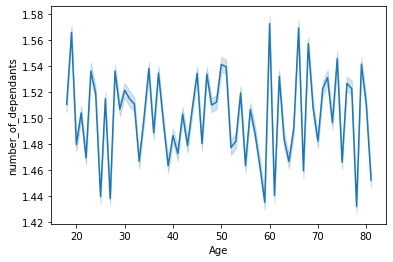

In [45]:
line_2 = sns.lineplot(data = df_2, x = 'Age', y='number_of_dependants')

# To create line chart for the columns orders_day_of_week' and 'prices'

### The line graph above shows that the older customers who shop at Insta Cart have more dependants compared to the customers who are younger. 

### But the graph also shows that customers below 20 years also have a high number of dependants as they could be living with their family.

# Task 7

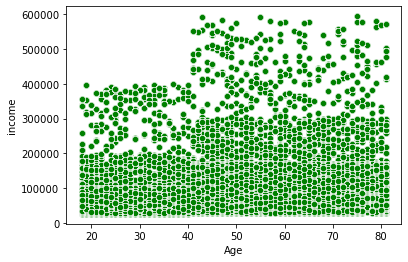

In [41]:
scat = sns.scatterplot(x = 'Age', y = 'income', data=df_cust_ord_prod, color='green')

### The scatterplot shows that the more older group of customer have a higher spending power due to their high incomes, as compared to the lower income generated by the customers in lower age group.

### Income (spending power) increases a lot for the customers aged 40 onwards.

# Task 8 - Exporting Charts

In [47]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty.png'))

In [48]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_customer_visit_freq.png'))

In [49]:
line_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_ordered_hour.png'))

In [50]:
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependants.png'))

In [51]:
scat.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scat_age_income.png'))